<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Prg3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Program_3b_dataset.csv')

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Data Preprocessing**

In [18]:
df.shape

(1372, 5)

In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


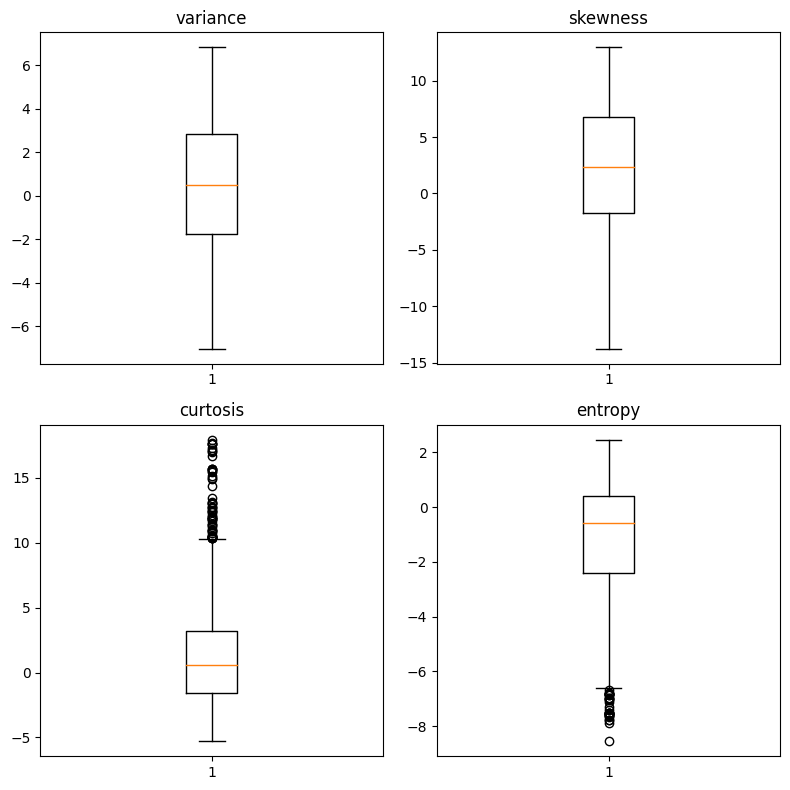

In [9]:
num_df = df[['variance', 'skewness', 'curtosis', 'entropy']]
num_attributes = len(num_df.columns)
num_cols = 2
num_rows = -(-num_attributes // num_cols)  # Ceiling division to ensure enough rows

# Calculate figsize based on the number of rows and columns
fig_width = 4 * num_cols
fig_height = 4 * num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot boxplots for each attribute
for i, col in enumerate(num_df.columns):
    axes[i].boxplot(num_df[col])
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Logistic Regression model using scikit-learn**

In [10]:
from sklearn.model_selection import train_test_split

X=num_df
Y=df[['class']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [14]:
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Classification Report and Accuracy**

In [15]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred_train = logreg.predict(X_train)
accuracy_train = accuracy_score(Y_train,Y_pred_train)
Y_pred_test = logreg.predict(X_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

report = classification_report(Y_test, Y_pred_test)

print(f'Accuracy(train): {accuracy_train:.2f}')
print(f'Accuracy(test): {accuracy_test:.2f}')


print(report)

Accuracy(train): 0.99
Accuracy(test): 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



**Confusion Matrix**

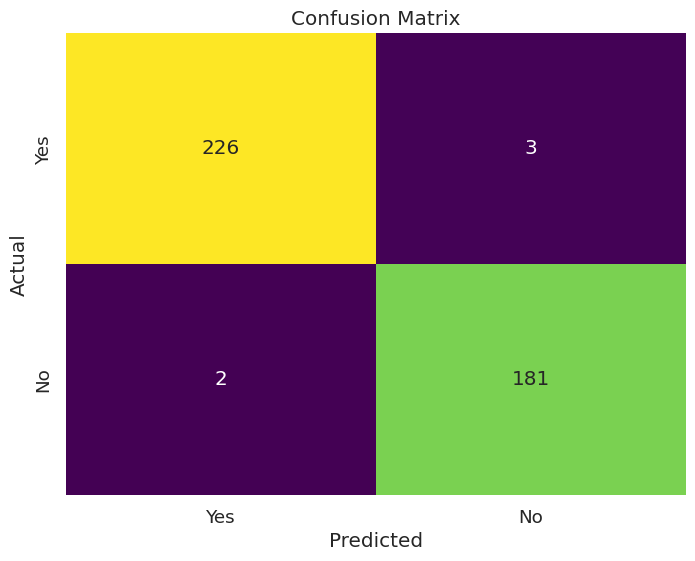

In [16]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred_test)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Most of the data points were correctly predicted with very few number of False Positives and False Negatives. The reason for this are-**


1.   **There are less number of data points.**
2.   **All the attributes were taken into consideration during the building of the Logistic Regression Classification Model.**

